In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import gc

# Train.csv

In [3]:
train = pd.read_csv('../data/raw/train.csv')
train.shape

(201917, 6)

In [8]:
train['first_active_date'] = pd.to_datetime(train['first_active_month'] + "-01")

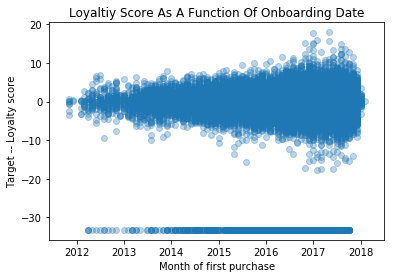

In [15]:
plt.scatter(train.first_active_date.values, train.target.values, alpha=0.3)
plt.ylabel("Target -- Loyalty score")
plt.xlabel("Month of first purchase")
plt.title("Loyaltiy Score As A Function Of Onboarding Date")

plt.show()

Interestingly, the loyalty score becomes much more varied over time. This may be a result of different merchandisers being available, or, a widening target audience.

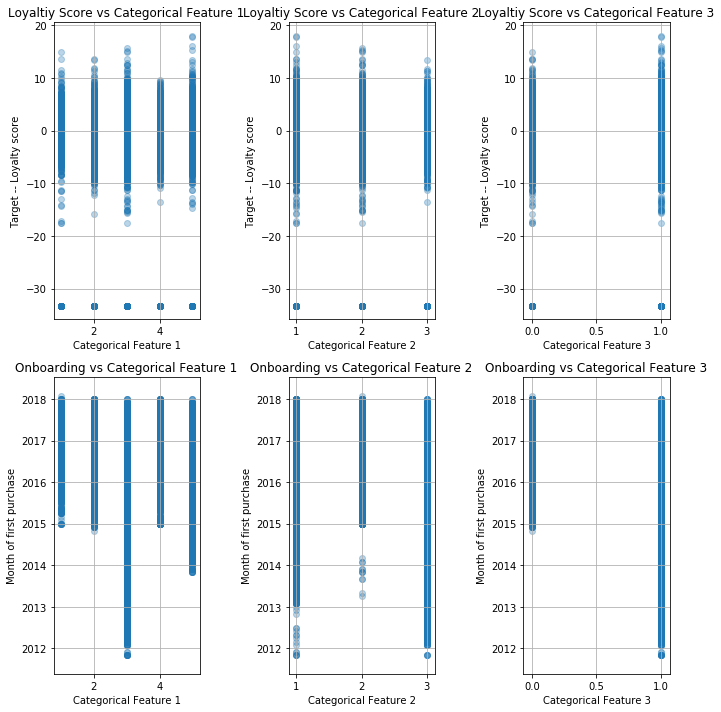

In [22]:
plt.figure(1, figsize=(10, 10))

plt.subplot(231)
plt.scatter(train.feature_1.values, train.target.values, alpha=0.3)
plt.ylabel("Target -- Loyalty score")
plt.xlabel("Categorical Feature 1")
plt.title("Loyaltiy Score vs Categorical Feature 1")
plt.grid(True)

plt.subplot(232)
plt.scatter(train.feature_2.values, train.target.values, alpha=0.3)
plt.ylabel("Target -- Loyalty score")
plt.xlabel("Categorical Feature 2")
plt.title("Loyaltiy Score vs Categorical Feature 2")
plt.grid(True)

plt.subplot(233)
plt.scatter(train.feature_3.values, train.target.values, alpha=0.3)
plt.ylabel("Target -- Loyalty score")
plt.xlabel("Categorical Feature 3")
plt.title("Loyaltiy Score vs Categorical Feature 3")
plt.grid(True)

plt.subplot(234)
plt.scatter(train.feature_1.values, train.first_active_date.values, alpha=0.3)
plt.ylabel("Month of first purchase")
plt.xlabel("Categorical Feature 1")
plt.title("Onboarding vs Categorical Feature 1")
plt.grid(True)

plt.subplot(235)
plt.scatter(train.feature_2.values, train.first_active_date.values, alpha=0.3)
plt.ylabel("Month of first purchase")
plt.xlabel("Categorical Feature 2")
plt.title("Onboarding vs Categorical Feature 2")
plt.grid(True)

plt.subplot(236)
plt.scatter(train.feature_3.values, train.first_active_date.values, alpha=0.3)
plt.ylabel("Month of first purchase")
plt.xlabel("Categorical Feature 3")
plt.title("Onboarding vs Categorical Feature 3")
plt.grid(True)

plt.tight_layout()
plt.show()

There is no direct relationship visible between categorical values and loyalty score. However, there are categorical features that only exist after 2015, which lines up with the graph above showing that there is more variance in loyalty score after 2015.

In [24]:
del train
gc.collect()

39161

# historical_transactions.csv

In [27]:
trans = pd.read_csv('../data/raw/historical_transactions.csv', nrows=100000)
trans.shape

(100000, 14)

In [28]:
trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,92369.000000,100000.000000,100000.000000
mean,126.210920,0.543020,473.23111,-5.062250,-0.338021,2.220344,10.930020,27.507800
std,98.287218,0.958415,248.37344,3.725321,46.320190,1.548631,6.215131,9.544759
min,-1.000000,-1.000000,-1.00000,-13.000000,-0.746893,1.000000,-1.000000,-1.000000
25%,57.000000,0.000000,278.00000,-8.000000,-0.722385,1.000000,9.000000,19.000000
50%,88.000000,0.000000,451.00000,-4.000000,-0.694465,1.000000,9.000000,33.000000
75%,189.000000,1.000000,705.00000,-2.000000,-0.622755,3.000000,16.000000,34.000000
max,347.000000,12.000000,891.00000,0.000000,11269.666518,5.000000,24.000000,41.000000


In [29]:
trans.authorized_flag.value_counts()

Y    93002
N     6998
Name: authorized_flag, dtype: int64